# Name - Neha Fatima

# The Spark Foundation

# Data Science and Business Analytics Intern

# TASK 1:Prediction using supervised ML


In [5]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

In [8]:
#Reading the data
data=pd.read_csv('student.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Exploratory Analysis

In [13]:
#information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [14]:
#describing entire data
data.describe(include='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [15]:
#check whether any null value present in the dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Hence there is no null value so data cleaning is not required.

# Data Visualization

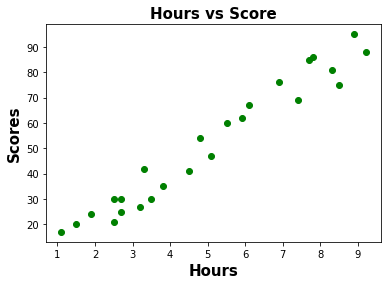

In [16]:
##Plotting Scatter plot
plt.xlabel('Hours',fontsize=15, fontweight='bold')
plt.ylabel('Scores',fontsize=15,fontweight='bold')
plt.title('Hours vs Score',fontsize=15,fontweight='bold')
plt.scatter(data.Hours,data.Scores,color='green')
plt.show()

The above plot shows positive relationship between Scores and hours studied.

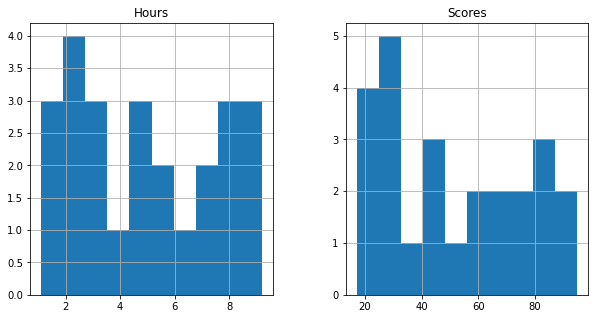

In [17]:
data.hist(bins=10, figsize=(10,5))
plt.show()

In [18]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


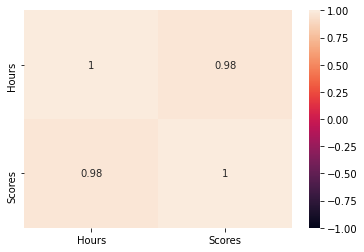

In [19]:
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True);

In [20]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,1].values
print(X)
print(Y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# Preparing Data and splitting into train and test sets.

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0,test_size=0.2)

In [22]:
print("X train.shape =",X_train.shape)
print("Y train.shape =",Y_train.shape)
print("X test.shape =",X_test.shape)
print("Y test.shape =",Y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape = (5, 1)
Y test.shape = (5,)


<B>TRAINING THE MODEL<B>

In [23]:
linreg=LinearRegression()

In [24]:
#Fitting Training Data
linreg.fit(X_train,Y_train)

LinearRegression()

In [25]:
print("B0=",linreg.intercept_,"\nB1=",linreg.coef_)

B0= 2.018160041434683 
B1= [9.91065648]


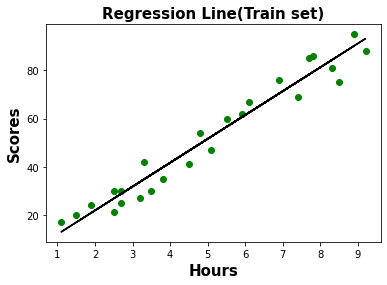

In [26]:
#plotting on train data
import matplotlib.pyplot as plt
plt.scatter(X,Y,color='green')
line=linreg.coef_*X+linreg.intercept_
plt.plot(X,line,color='black')
plt.xlabel("Hours",fontsize=15,fontweight='bold')
plt.ylabel("Scores",fontsize=15,fontweight='bold')
plt.title("Regression Line(Train set)",fontsize=15,fontweight='bold')
plt.show()



<b>TEST DATA</b>

In [27]:
#Predicting the Scores for test data
Y_pred=linreg.predict(X_test)
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


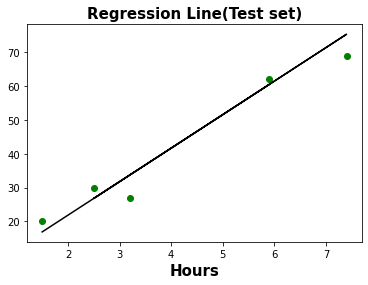

In [28]:
#Plotting line on the test data
plt.plot(X_test,Y_pred,color='black')
plt.scatter(X_test,Y_test,color='green')
plt.xlabel("Hours",fontsize=15,fontweight='bold')
plt.title("Regression Line(Test set)",fontsize=15,fontweight='bold')
plt.show()

<b>Comparing actual and predicted scores</b>

In [29]:
Y_test1=list(Y_test)
prediction=list(Y_pred)
df_compare=pd.DataFrame({'Actual':Y_test1,'Result':prediction})
df_compare

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


 <b>Accuracy of Model</b>

In [30]:
metrics.r2_score(Y_test,Y_pred)

0.9454906892105356

94% indicates the above fitted model is good model

<B>Predicting Error</B>

In [31]:
Mean_Absolute_Error=np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print("Mean Absolute Error =",Mean_Absolute_Error)

Mean Absolute Error = 4.6474476121003665


<b>Predicting the score</b>

In [32]:
Score_prediction=linreg.predict([[9.25]])
print("Predicted score for a student studing 9.25 hours:",Score_prediction)

Predicted score for a student studing 9.25 hours: [93.69173249]


<b>CONCLUSION</b>

<b>From the above results we can say that if students studied for 9.25 hours then they may get 93.69 %</b>